## Exploratory Data Analysis

#### 1. Aufgabe 
Erstellen Sie aus der Datei `automobile.csv` ein DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# code
df_automobile = pd.read_csv('automobile.csv')

#### 2. Aufgabe
Ermitteln Sie die Datenlücken in Dataframe und behandeln Sie diese.

In [4]:
# code
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [9]:
df_automobile.isnull().sum()
# df_automobile.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
df_copy = df_automobile.copy()
df_copy = df_copy.dropna()
df_copy.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [40]:
df_copy_2 = df_automobile.copy()
df_copy_2['stroke'] = df_copy_2['stroke'].fillna (df_copy_2['stroke'].mean().round(2))


#### 3. Aufgabe
Finden Sie die Korrelationen unter den folgenden Spalten in Dataframe: `bore`, `stroke`,`compression-ratio` und `horsepower`  <br>
Erstellen Sie dazu eine Korrelationsmatriz.

In [41]:
# code
df_teil = df_copy[['bore', 'stroke', 'compression-ratio', 'horsepower']]
df_teil.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.567984
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001250,0.187923,1.000000,-0.214350
horsepower,0.567984,0.098462,-0.214350,1.000000


In [42]:
df_teil_2 = df_copy_2[['bore', 'stroke', 'compression-ratio', 'horsepower']]
df_teil_2.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055391,0.001263,0.566936
stroke,-0.055391,1.000000,0.187816,0.098314
compression-ratio,0.001263,0.187816,1.000000,-0.214514
horsepower,0.566936,0.098314,-0.214514,1.000000


#### 4. Aufgabe
Erstellen Sie mit Seaborn Regresseionsplots, um die Korrelationen zwischen den Variablen `bore`, `stroke`,`compression-ratio` und `horsepower` zu visualisieren. Welche positive lineare Korrelationen können dabei beobachtet werden?

In [13]:
import seaborn as sns

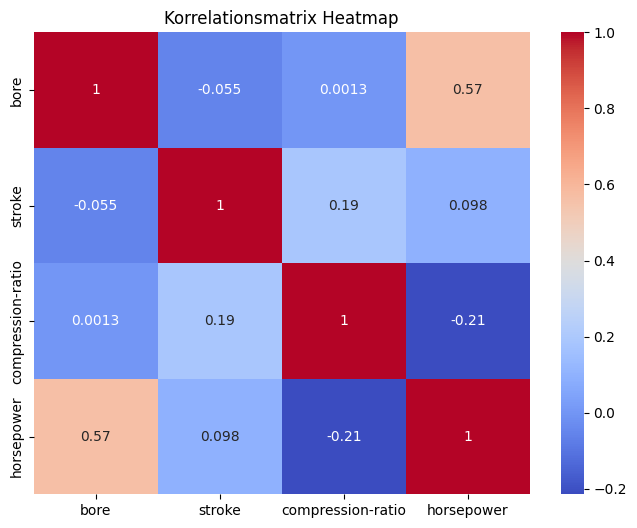

In [43]:
# code
plt.figure(figsize=(8, 6))
sns.heatmap(df_teil.corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix Heatmap")
plt.show()

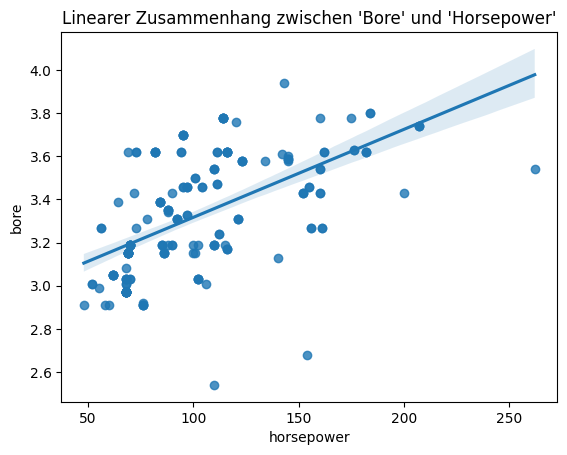

In [44]:
sns.regplot(y='bore', x='horsepower', data=df_copy, ci=90)
plt.title("Linearer Zusammenhang zwischen 'Bore' und 'Horsepower'")
plt.show()


In [45]:
df_copy.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [58]:
df_copy['horsepower-binned'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

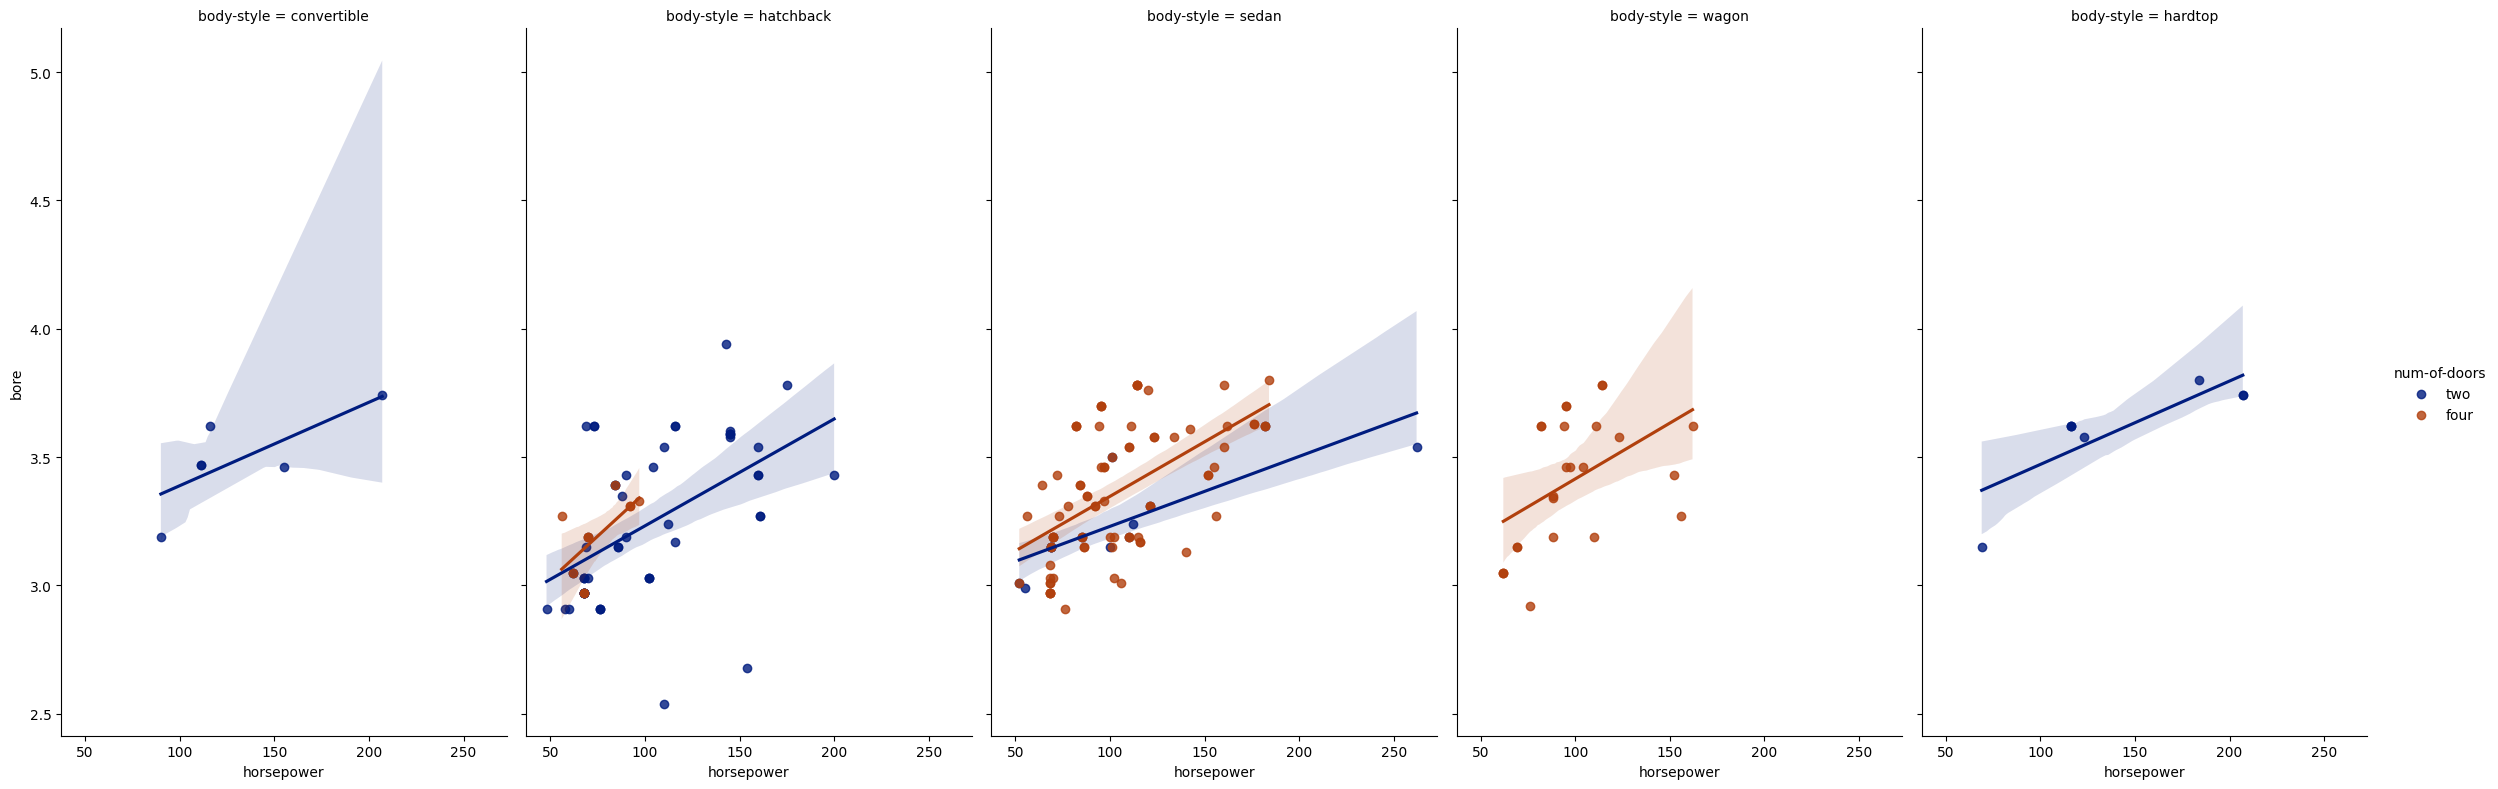

In [82]:
sns.lmplot(x='horsepower', y='bore', data=df_copy, col='body-style', hue='num-of-doors', palette='dark',
          aspect=0.6,height=8)

In [81]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [75]:
sns.palettes.SEABORN_PALETTES.keys()

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])